In [112]:
from pymavlink import mavutil

import matplotlib.pyplot as plt
import pandas as pd
import os
import geopandas as gpd
from shapely.geometry import Point, LineString

In [113]:
path_log = 'G:/Ingenio Azucarero Guabira S.A/UTEA - SEMANAL - EQUIPO AVIACION UTEA/Trichogramma/log_vuelo_2025/logs04'
path_res = 'G:/Ingenio Azucarero Guabira S.A/UTEA - SEMANAL - EQUIPO AVIACION UTEA/Trichogramma/log_vuelo_2025/logs04_shp'

In [114]:
contenido = os.listdir(path_log)
len(contenido)

17

In [115]:
contenido

['2024-06-27 08-32-25.tlog',
 '2024-06-27 08-36-56.tlog',
 '2024-06-27 08-39-58.tlog',
 '2024-06-27 09-41-46.tlog',
 '2024-06-27 10-22-41.tlog',
 '2024-06-27 11-42-11.tlog',
 '2024-06-27 11-43-32.tlog',
 '2024-06-27 11-44-13.tlog',
 '2024-06-27 11-44-59.tlog',
 '2024-06-27 12-54-04.tlog',
 '2024-06-27 13-07-44.tlog',
 '2024-06-27 14-21-22.tlog',
 '2024-06-27 14-33-51.tlog',
 '2024-06-27 16-41-20.tlog',
 '2024-06-27 18-39-33.tlog',
 '2024-06-27 19-06-35.tlog',
 '2024-06-28 07-44-19.tlog']

In [116]:
def leer_logs(lista_logs):
    list_geo = []
    list_name = []
    for i in lista_logs:
        log = path_log + '/' + i
        mlog = mavutil.mavlink_connection(log)
        lats = []
        lons = []
        while True:
            msg = mlog.recv_match()
            if not msg:
                break
            # Ejemplo de procesamiento de mensaje
            if msg.get_type() == 'GLOBAL_POSITION_INT':
                lat = msg.lat / 1e7  # Latitud en grados
                lon = msg.lon / 1e7  # Longitud en grados
                lats.append(lat)
                lons.append(lon)

        coors = {'lat':lats, 'lon':lons}
        df = pd.DataFrame(coors)
        
        geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
        line = LineString(geometry)
        list_geo.append(line)
        list_name.append(i)
    #dict_lines = {'geos':list_geo, 'names':list_name}
    #gdf_line = gpd.GeoDataFrame(dict_lines, crs="EPSG:4326")
    #gdf_line_utm = gdf_line.to_crs(epsg=32720)
    return (list_geo, list_name)

In [117]:
lineas, names = leer_logs(contenido)

In [118]:
len(lineas)

17

In [119]:
len(names)

17

In [126]:
# Crear un GeoDataFrame con los LineStrings y sus nombres
gdf_lines = gpd.GeoDataFrame({'name': names, 'geometry': lineas}, crs="EPSG:4326")

In [127]:
gdf_lines

,name,geometry
0,2024-06-27 08-32-25.tlog,"LINESTRING (-62.96774 -17.29691, -62.96774 -17..."
1,2024-06-27 08-36-56.tlog,"LINESTRING (-62.96773 -17.29692, -62.96773 -17..."
2,2024-06-27 08-39-58.tlog,"LINESTRING (-62.96773 -17.29691, -62.96773 -17..."
3,2024-06-27 09-41-46.tlog,"LINESTRING (-62.96774 -17.29691, -62.96774 -17..."
4,2024-06-27 10-22-41.tlog,"LINESTRING (-62.96161 -17.29505, -62.96161 -17..."
5,2024-06-27 11-42-11.tlog,"LINESTRING (-62.96774 -17.29715, -62.96774 -17..."
6,2024-06-27 11-43-32.tlog,"LINESTRING (-63.20020 -17.23775, -63.20020 -17..."
7,2024-06-27 11-44-13.tlog,"LINESTRING (-63.20020 -17.23775, -63.20020 -17..."
8,2024-06-27 11-44-59.tlog,"LINESTRING (-63.20020 -17.23775, -63.20020 -17..."
9,2024-06-27 12-54-04.tlog,"LINESTRING (-63.20020 -17.23776, -63.20020 -17..."


In [131]:
gdf_lines = gdf_lines[gdf_lines['name']=='2024-06-27 18-39-33.tlog']

In [133]:
gdf_lines

,name,geometry
14,2024-06-27 18-39-33.tlog,"LINESTRING (-63.13927 -17.26177, -63.13927 -17..."


In [147]:
str(gdf_lines['geometry'][14])

'LINESTRING (-63.1392725 -17.2617694, -63.1392725 -17.2617694, -63.1392727 -17.2617695, -63.1392732 -17.2617695, -63.1392732 -17.2617695, -63.1392733 -17.2617695, -63.1392733 -17.2617695, -63.1392734 -17.2617695, -63.1392734 -17.2617695, -63.1392735 -17.2617695, -63.1392735 -17.2617695, -63.1392735 -17.2617695, -63.1392735 -17.2617695, -63.1392735 -17.2617695, -63.1392736 -17.2617695, -63.1392736 -17.2617695, -63.1392736 -17.2617695, -63.1392737 -17.2617695, -63.1392737 -17.2617695, -63.1392738 -17.2617695, -63.1392739 -17.2617694, -63.1392739 -17.2617693, -63.1392738 -17.2617692, -63.1392738 -17.2617691, -63.1392738 -17.2617691, -63.1392739 -17.261769, -63.1392739 -17.2617689, -63.1392739 -17.2617689, -63.1392739 -17.2617688, -63.1392739 -17.2617688, -63.1392739 -17.2617687, -63.1392739 -17.2617686, -63.139274 -17.2617686, -63.1392741 -17.2617685, -63.1392742 -17.2617685, -63.1392742 -17.2617686, -63.1392742 -17.2617686, -63.1392742 -17.2617685, -63.1392742 -17.2617685, -63.1392743 -1

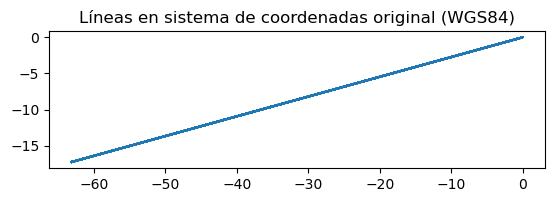

In [134]:
gdf_lines.plot()
plt.title('Líneas en sistema de coordenadas original (WGS84)')
plt.show()

In [135]:
gdf_lines_utm = gdf_lines.to_crs(epsg=32720)

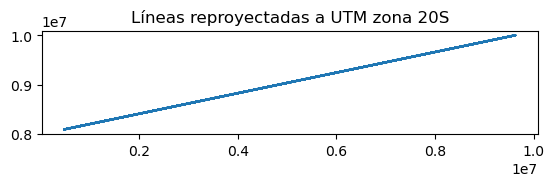

In [136]:
gdf_lines_utm.plot()
plt.title('Líneas reproyectadas a UTM zona 20S')
plt.show()

In [137]:
output_path = 'output_lines_with_names_shapefile.shp'
gdf_lines_utm.to_file(output_path)

In [83]:
log = path_log + '/' + '2024-06-27 14-33-51.tlog'

In [84]:
mlog = mavutil.mavlink_connection(log)

In [85]:
lats = []
lons = []

In [86]:
while True:
    msg = mlog.recv_match()
    if not msg:
        break
    # Ejemplo de procesamiento de mensaje
    if msg.get_type() == 'GLOBAL_POSITION_INT':
        lat = msg.lat / 1e7  # Latitud en grados
        lon = msg.lon / 1e7  # Longitud en grados
        alt = msg.alt / 1e3  # Altitud en metros
        
        lats.append(lat)
        lons.append(lon)
        #print(f"Latitud: {lat}, Longitud: {lon}, Altitud: {alt}")

In [87]:
coors = {'lat':lats, 'lon':lons}

In [88]:
df = pd.DataFrame(coors)

In [89]:
df

,lat,lon
0,-17.240544,-63.191583
1,-17.240544,-63.191583
2,-17.240544,-63.191583
3,-17.240544,-63.191583
4,-17.240543,-63.191583
...,...,...
1281,-17.240540,-63.191579
1282,-17.240540,-63.191579
1283,-17.240539,-63.191579
1284,-17.240538,-63.191578


In [90]:
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Establecer el sistema de coordenadas original (WGS84)
gdf.set_crs(epsg=4326, inplace=True)
# Reproyectar a UTM zona 20S
gdf_utm = gdf.to_crs(epsg=32720)

line = LineString(geometry)
gdf_line = gpd.GeoDataFrame(geometry=[line], crs="EPSG:4326")
gdf_line_utm = gdf_line.to_crs(epsg=32720)

In [95]:
gdf_line_utm['name']='frgrgr'

In [96]:
gdf_line_utm

,geometry,name
0,"LINESTRING (479633.490 8093824.325, 479633.479...",frgrgr


In [97]:
output_path = path_res + '/output_line_shapefile.shp'
gdf_line_utm.to_file(output_path)